### Load Modules

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/brain-tumor-detection-master.zip

Archive:  /content/brain-tumor-detection-master.zip
01c14846966ea1405e401fbb8f1259ce7241509a
   creating: brain-tumor-detection-master/
   creating: brain-tumor-detection-master/.ipynb_checkpoints/
  inflating: brain-tumor-detection-master/.ipynb_checkpoints/PROJECT Brain Tumor Classification-checkpoint.ipynb  
  inflating: brain-tumor-detection-master/PROJECT Brain Tumor Classification.ipynb  
  inflating: brain-tumor-detection-master/README.md  
   creating: brain-tumor-detection-master/brain_tumor/
   creating: brain-tumor-detection-master/brain_tumor/Testing/
   creating: brain-tumor-detection-master/brain_tumor/Testing/no_tumor/
  inflating: brain-tumor-detection-master/brain_tumor/Testing/no_tumor/image(1).jpg  
  inflating: brain-tumor-detection-master/brain_tumor/Testing/no_tumor/image(10).jpg  
  inflating: brain-tumor-detection-master/brain_tumor/Testing/no_tumor/image(100).jpg  
  inflating: brain-tumor-detection-master/brain_tumor/Testing/no_tumor/image(101).jpg  
  inflati

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Prepare/collect data

In [ ]:
import cv2
X = []
Y = []
for cls in classes:
    pth = os.path.join('/content/brain-tumor-detection-master/brain_tumor/Training', cls)
    for j in os.listdir(pth):
        img = cv2.imread(os.path.join(pth, j), 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [ ]:
X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X), -1)

In [ ]:
np.unique(Y)

array([0, 1])

In [ ]:
pd.Series(Y).value_counts()

1    827
0    395
dtype: int64

In [ ]:
X.shape, X_updated.shape

((1222, 200, 200), (1222, 40000))

### Visualize data

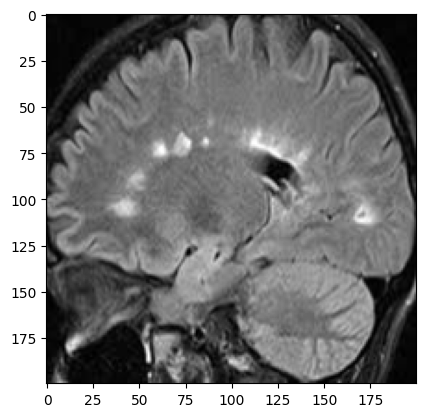

In [ ]:
plt.imshow(X[0], cmap='gray')

### Preprocessing

In [ ]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(1222, 40000)

### Split Data

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10, test_size=.20)

In [ ]:
xtrain.shape, xtest.shape

((977, 40000), (245, 40000))

### Feature Scaling

In [ ]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


### Feature Selection: PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
print(xtrain.shape, xtest.shape)

pca = PCA(.98)
# pca_train = pca.fit_transform(xtrain)
# pca_test = pca.transform(xtest)
pca_train = xtrain
pca_test = xtest

(977, 40000) (245, 40000)


### Train Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [ ]:


lg = LogisticRegression(C=0.1)
lg.fit(xtrain, ytrain)


LogisticRegression(C=0.1)

In [ ]:
sv = SVC()
sv.fit(xtrain, ytrain)

SVC()

### Evaluation

In [ ]:
print("Training Score:", lg.score(xtrain, ytrain))
print("Testing Score:", lg.score(xtest, ytest))

Training Score: 1.0
Testing Score: 0.9469387755102041


In [ ]:
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

Training Score: 0.9928352098259979
Testing Score: 0.9551020408163265


### Prediction

In [ ]:
pred = sv.predict(xtest)


In [ ]:
misclassified=np.where(ytest!=pred)
misclassified

(array([  5,  37,  75,  90,  99, 146, 153, 166, 169, 204, 222]),)

In [ ]:
print("Total Misclassified Samples: ",len(misclassified[0]))
print(pred[36],ytest[36])

Total Misclassified Samples:  11
1 1


### TEST MODEL

In [ ]:
dec = {0:'No Tumor', 1:'Positive Tumor'}

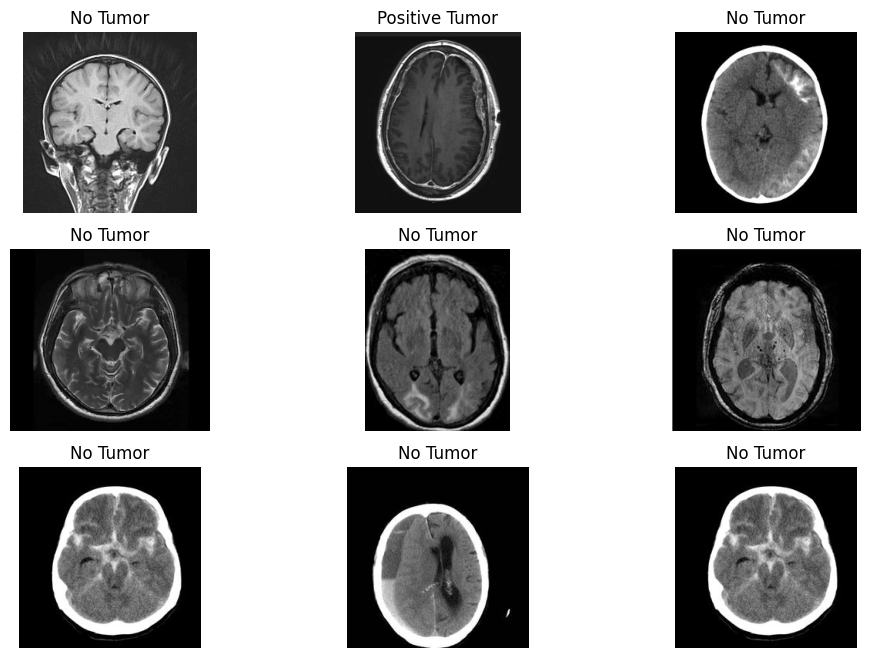

In [ ]:
plt.figure(figsize=(12, 8))
p = os.listdir('/content/brain-tumor-detection-master/brain_tumor/Testing')
c = 1
for i in os.listdir('/content/brain-tumor-detection-master/brain_tumor/Testing/no_tumor')[:9]:
    plt.subplot(3, 3, c)

    img = cv2.imread('/content/brain-tumor-detection-master/brain_tumor/Testing/no_tumor/' + i, 0)
    img1 = cv2.resize(img, (200, 200))
    img1 = img1.reshape(1, -1) / 255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c += 1

plt.show()

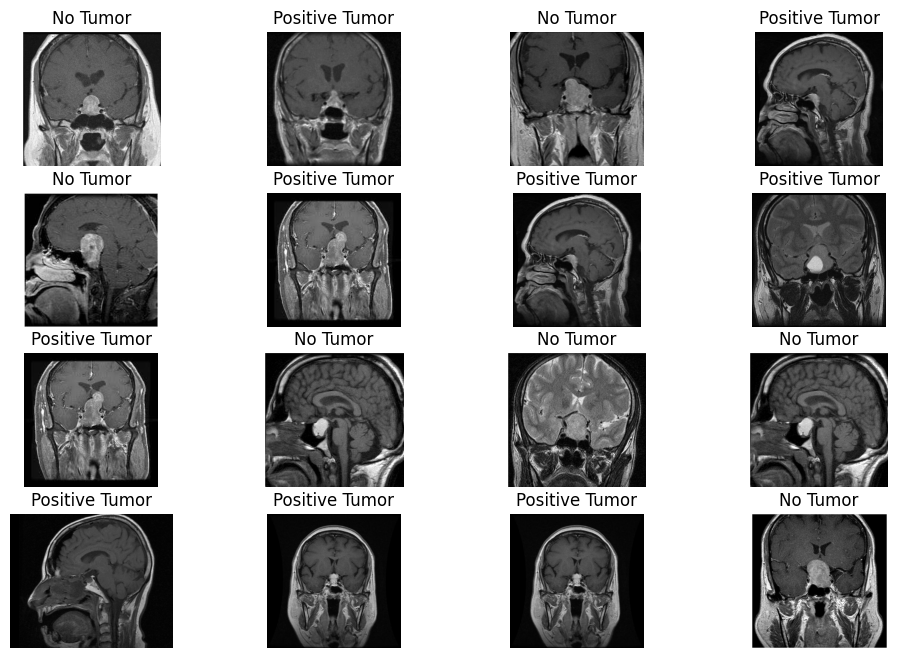

In [ ]:
plt.figure(figsize=(12,8))
p = os.listdir('/content/brain-tumor-detection-master/brain_tumor/Testing')
c=1
for i in os.listdir('/content/brain-tumor-detection-master/brain_tumor/Testing/pituitary_tumor')[:16]:
    plt.subplot(4,4,c)

    img = cv2.imread('/content/brain-tumor-detection-master/brain_tumor/Testing/pituitary_tumor/' + i, 0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1